<a href="https://colab.research.google.com/github/LongNguyen1984/Biosignal-analysis/blob/master/importPhysioNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cài đặt gói wfdb để đọc định dạng dữ liệu từ Physionet

In [2]:
pip install wfdb

     |████████████████████████████████| 122kB 9.0MB/s 
     |████████████████████████████████| 6.9MB 11.2MB/s 


In [4]:
from IPython.display import display
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import os
import shutil
import posixpath

import wfdb

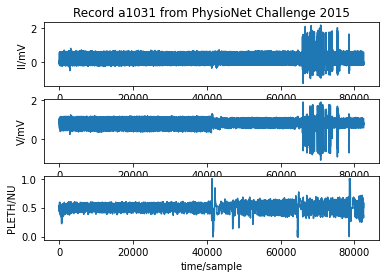

{'adc_gain': [7247.0, 10520.0, 12530.0],
 'adc_res': [16, 16, 16],
 'adc_zero': [0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0],
 'block_size': [0, 0, 0],
 'byte_offset': [24, 24, 24],
 'checksum': [-27403, -301, -17391],
 'comments': ['Asystole', 'False alarm'],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['a103l.mat', 'a103l.mat', 'a103l.mat'],
 'fmt': ['16', '16', '16'],
 'fs': 250,
 'init_value': [-171, 9127, 6042],
 'n_sig': 3,
 'p_signal': array([[-0.02359597,  0.86758555,  0.48220271],
        [-0.03698082,  0.98298479,  0.5443735 ],
        [-0.06292259,  0.85979087,  0.47821229],
        ...,
        [-0.04084449,  0.7493346 ,  0.5150838 ],
        [-0.04719194,  0.7581749 ,  0.50957702],
        [-0.04677798,  0.7615019 ,  0.5028731 ]]),
 'record_name': 'a103l',
 'samps_per_frame': [1, 1, 1],
 'sig_len': 82500,
 'sig_name': ['II', 'V', 'PLETH'],
 'skew': [None, None, None],


In [8]:
# Demo 1 - Đọc một bản ghi WFDB dùng hàm 'rdrecord' vô đối tượng wfdb.Record
# Vẽ các tín hiệu và mô tả dữ liệu
#record = wfdb.rdrecord('sample-data/a1031') 
#wfdb.plot_wfdb(record=record, title='Record a1031 from PhysioNet Challenge 2015')
#display(record.__dict__)

# Có thể đọc cùng các tệp trên PhysioNet https://physionet.org/content/challenge-2015/1.0.0
# in the /training/ database subdirectory
record2 = wfdb.rdrecord('a103l', pn_dir ='challenge-2015/training/')
wfdb.plot_wfdb(record=record2, title='Record a1031 from PhysioNet Challenge 2015')
display(record2.__dict__)

In [10]:
# Demo 2 - Đọc một kênh nào đó và các phần của bản ghi WFDB sử dụng si
# trả về mảng numpy và một dictionary. Mô tả dữ liệu.
#signals, fields = wfdb.rdsamp('sample-data/s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000)
#display(signals)
#display(fields)

signals2, fields2 = wfdb.rdsamp('s0010_re', channels=[14, 0, 5, 10], sampfrom=100, sampto=15000, pn_dir='ptbdb/patient001/')
display(signals2)
display(fields2)

array([[ 0.0335, -0.167 , -0.237 ,  0.1165],
       [ 0.0355, -0.1615, -0.2395,  0.119 ],
       [ 0.0385, -0.168 , -0.2465,  0.116 ],
       ...,
       [-0.0445,  0.008 ,  0.033 ,  0.045 ],
       [-0.044 ,  0.0175,  0.042 ,  0.052 ],
       [-0.044 ,  0.0245,  0.0365,  0.05  ]])

{'base_date': None,
 'base_time': None,
 'comments': ['age: 81',
  'sex: female',
  'ECG date: 01/10/1990',
  'Diagnose:',
  'Reason for admission: Myocardial infarction',
  'Acute infarction (localization): infero-latera',
  'Former infarction (localization): no',
  'Additional diagnoses: Diabetes mellitus',
  'Smoker: no',
  'Number of coronary vessels involved: 1',
  'Infarction date (acute): 29-Sep-90',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: 16-Oct-90',
  'Ventriculography: Akinesia inferior wall',
  'Chest X-ray: Heart size upper limit of norm',
  'Peripheral blood Pressure (syst/diast):  140/80 mmHg',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest): n/a',
  'Pulmonary artery pressu

In [11]:
# Demo 3 - Chỉ đọc một tệp header WFDB  (không bao gồm các tín hiệu)
# record = wfdb.rdheader('sample-data/drive02')
# display(record.__dict__)

# Can also read the same file hosted on Physionet
record2 = wfdb.rdheader('drive02', pn_dir='drivedb')
display(record2.__dict__)

{'adc_gain': [1000.0, 1000.0, 1.0001, 100.0, 500.0],
 'adc_res': [16, 16, 16, 16, 16],
 'adc_zero': [0, 0, 0, 0, 0],
 'base_counter': None,
 'base_date': None,
 'base_time': None,
 'baseline': [0, 0, 0, 0, 0],
 'block_size': [0, 0, 0, 0, 0],
 'byte_offset': [None, None, None, None, None],
 'checksum': [14736, 13501, -19070, -9226, -14191],
 'comments': [],
 'counter_freq': None,
 'd_signal': None,
 'e_d_signal': None,
 'e_p_signal': None,
 'file_name': ['drive02.dat',
  'drive02.dat',
  'drive02.dat',
  'drive02.dat',
  'drive02.dat'],
 'fmt': ['16', '16', '16', '16', '16'],
 'fs': 15.5,
 'init_value': [-1236, 1802, 75, 0, 5804],
 'n_sig': 5,
 'p_signal': None,
 'record_name': 'drive02',
 'samps_per_frame': [32, 2, 1, 1, 2],
 'sig_len': 78056,
 'sig_name': ['ECG', 'foot GSR', 'HR', 'marker', 'RESP'],
 'skew': [None, None, None, None, None],
 'units': ['mV', 'mV', 'bpm', 'mV', 'mV']}

AttributeError: ignored

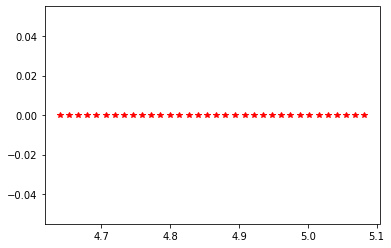

In [21]:
# Demo 4 - đọc một phần của tệp ghi chú WFDB vô đối tượng wfdb.Annotation, và biểu diễn mẫu

#annotation = wfdb.rdann('sample-data/100', 'atr', sampfrom=100000, sampto=110000)
#annotation.fs = 360
#wfdb.plot_wfdb(annotation=annotation, time_units='minutes')

# Có thể đọc cùng tệp trên PhysioNet
annotation2 = wfdb.rdann('100', 'atr', sampfrom=100000, sampto=110000, pn_dir='mitdb')
annotation2.fs = 360
wfdb.plot_wfdb(annotation=annotation2, time_units='minutes')


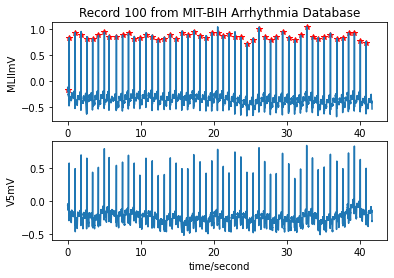

In [27]:
# Demo 5 - Đọc một bản ghi WFDB và ghi chú. Vẽ tất cả các kênh, và ghi chú phần đầu của kênh 0.
#record = wfdb.rdrecord('sample-data/100', sampto = 15000)
#annotation = wfdb.rdann('sample-data/100', 'atr', sampto = 15000)

record = wfdb.rdrecord('100', sampto=15000, pn_dir='mitdb')
annotation = wfdb.rdann('100', 'atr', sampto = 15000, pn_dir='mitdb')

wfdb.plot_wfdb(record=record, annotation=annotation,
               title='Record 100 from MIT-BIH Arrhythmia Database',
               time_units='seconds')